# **PROACTIVE ENERGY CONSUMPTION FORECASTING**

*MOUNTEDS *

In [ ]:
  from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/CAPSTONE/daily_electricity_data.csv')

In [ ]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01,142984,142186,33402,8246,30861,34032,33809,1039,787
1,2019-01-02,151729,163097,33380,26562,30065,38764,32175,1280,858
2,2019-01-03,174098,172854,32929,23743,35453,43732,35225,800,956
3,2019-01-04,183242,191724,32914,44510,33884,41808,36469,1092,1038
4,2019-01-05,177114,164069,33440,15108,29089,44158,39031,2226,1008


In [ ]:
df.tail()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
1527,2023-03-08,155634,164237,33519,20999,56938,23073,24084,4121,1470
1528,2023-03-09,156297,171406,33436,28115,58231,22835,24628,2675,1453
1529,2023-03-10,152572,168689,33413,27913,58109,22339,21550,3852,1470
1530,2023-03-11,143583,176914,33795,31368,61852,21764,23792,2833,1460
1531,2023-03-12,129580,164378,33770,20856,59036,21908,22190,5153,1423


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       1532 non-null   object
 1   Consumption    1532 non-null   int64 
 2   Production     1532 non-null   int64 
 3   Nuclear        1532 non-null   int64 
 4   Wind           1532 non-null   int64 
 5   Hydroelectric  1532 non-null   int64 
 6   Oil and Gas    1532 non-null   int64 
 7   Coal           1532 non-null   int64 
 8   Solar          1532 non-null   int64 
 9   Biomass        1532 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 119.8+ KB


In [ ]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

Original Data Description:
         Consumption     Production       Nuclear          Wind  \
count    1532.000000    1532.000000   1532.000000   1532.000000   
mean   161007.711488  157067.577023  31046.623368  18858.868799   
std     17444.184843   20050.172818   5631.691192  13389.781615   
min    108968.000000   94582.000000  15725.000000   -186.000000   
25%    148807.000000  142812.750000  32446.750000   8115.000000   
50%    161053.000000  155975.000000  33239.500000  15386.000000   
75%    172897.750000  170470.250000  33715.250000  26565.500000   
max    209479.000000  222723.000000  36945.000000  63844.000000   

       Hydroelectric   Oil and Gas          Coal         Solar      Biomass  
count    1532.000000   1532.000000   1532.000000   1532.000000  1532.000000  
mean    43243.179504  28362.205614  30484.233681   3636.973890  1409.693211  
std     14035.955461   9661.539766   7012.405654   1879.189349   313.868392  
min     15500.000000   6523.000000   8193.000000      0.0

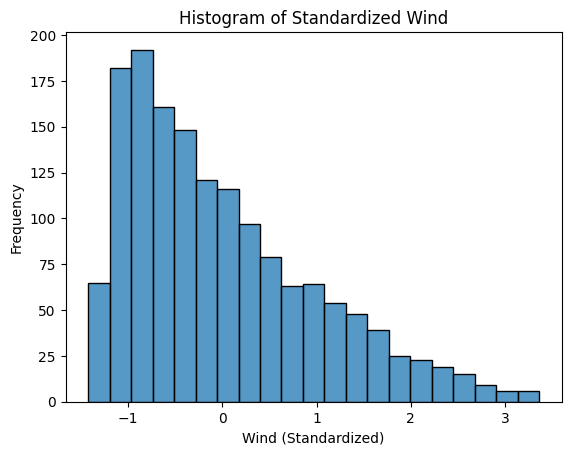

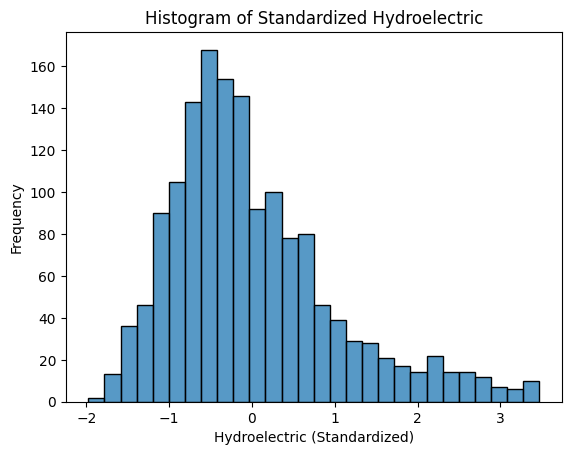

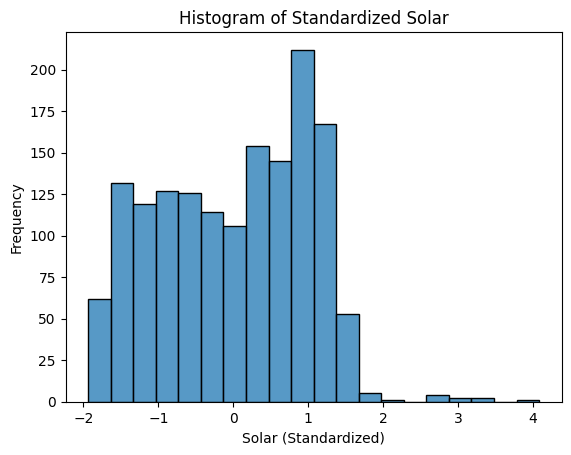

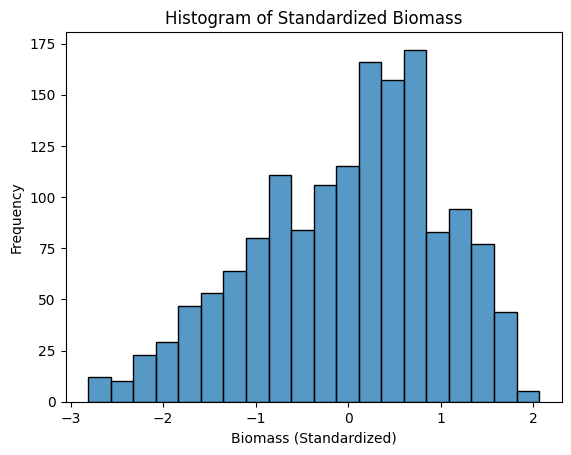

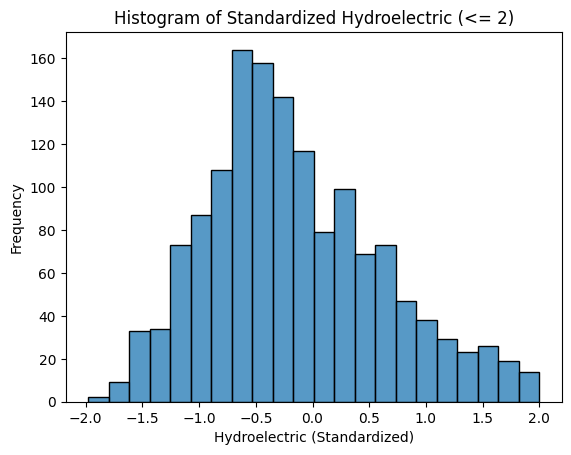

In [ ]:
from sklearn.preprocessing import StandardScaler

renewable_energy = ['Wind', 'Hydroelectric', 'Solar', 'Biomass']

# Create a StandardScaler object
scaler = StandardScaler()

# To avoid modifying the original
renewable_data = df.copy()

renewable_data[renewable_energy] = scaler.fit_transform(df[renewable_energy])


filtered_hydroelectric = renewable_data[renewable_data['Hydroelectric'] <= 2]


print("Original Data Description:")
print(df.describe())

print("\nStandardized Data Description:")
print(renewable_data.describe())

# Create histograms
for col in renewable_energy:
  plt.figure()
  sns.histplot(data=renewable_data, x=col)
  plt.title(f"Histogram of Standardized {col}")
  plt.xlabel(f"{col} (Standardized)")
  plt.ylabel("Frequency")
  plt.show()


if len(filtered_hydroelectric) > 0:
  plt.figure()
  sns.histplot(data=filtered_hydroelectric, x='Hydroelectric')
  plt.title("Histogram of Standardized Hydroelectric (<= 2)")
  plt.xlabel("Hydroelectric (Standardized)")
  plt.ylabel("Frequency")
  plt.show()
else:
  print("No data for Hydroelectric after filtering (all values > 2)")


Original Data Description:
         Consumption     Production       Nuclear          Wind  \
count    1532.000000    1532.000000   1532.000000   1532.000000   
mean   161007.711488  157067.577023  31046.623368  18858.868799   
std     17444.184843   20050.172818   5631.691192  13389.781615   
min    108968.000000   94582.000000  15725.000000   -186.000000   
25%    148807.000000  142812.750000  32446.750000   8115.000000   
50%    161053.000000  155975.000000  33239.500000  15386.000000   
75%    172897.750000  170470.250000  33715.250000  26565.500000   
max    209479.000000  222723.000000  36945.000000  63844.000000   

       Hydroelectric   Oil and Gas          Coal         Solar      Biomass  
count    1532.000000   1532.000000   1532.000000   1532.000000  1532.000000  
mean    43243.179504  28362.205614  30484.233681   3636.973890  1409.693211  
std     14035.955461   9661.539766   7012.405654   1879.189349   313.868392  
min     15500.000000   6523.000000   8193.000000      0.0

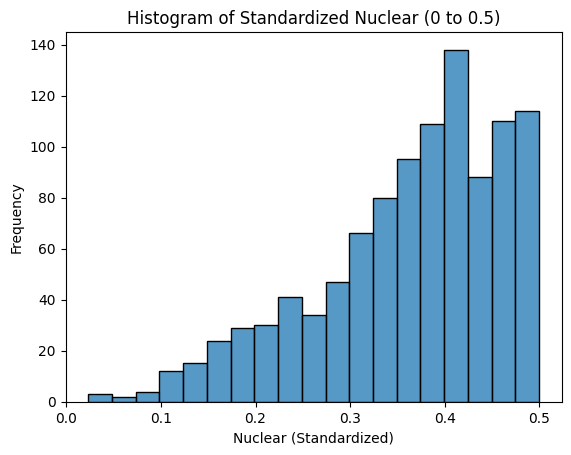

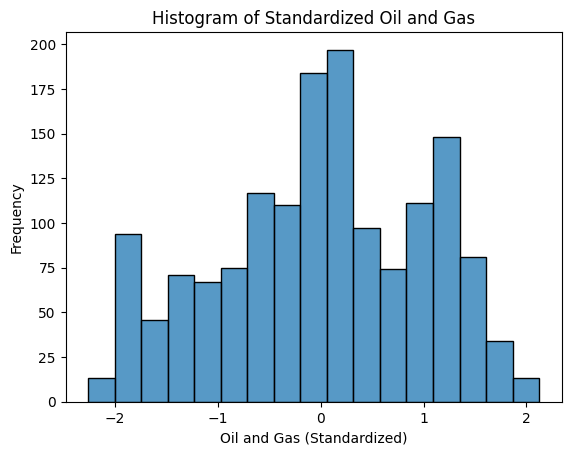

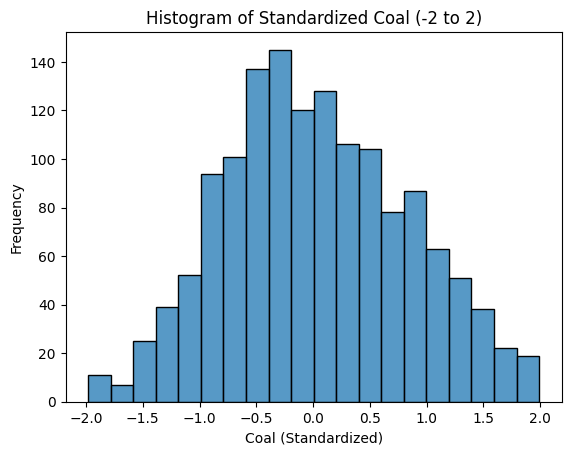

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming your data is loaded into a pandas DataFrame named 'df'

non_renewable_energy = ['Nuclear', 'Oil and Gas', 'Coal']


scaler = StandardScaler()

# To avoid modifying the original
non_renewable_data = df.copy()

non_renewable_data[non_renewable_energy] = scaler.fit_transform(df[non_renewable_energy])

filtered_nuclear = non_renewable_data[
    (non_renewable_data['Nuclear'] >= 0) & (non_renewable_data['Nuclear'] <= 0.5)]

filtered_coal = non_renewable_data[
    (non_renewable_data['Coal'] >= -2) & (non_renewable_data['Coal'] <= 2)]

# Print original and standardized data descriptions
print("Original Data Description:")
print(df.describe())

print("\nStandardized Data Description:")
print(non_renewable_data.describe())

# Create histograms
for col in non_renewable_energy:
  plt.figure()
  if col == 'Nuclear':
    sns.histplot(data=filtered_nuclear, x=col)
    plt.title(f"Histogram of Standardized {col} (0 to 0.5)")
  elif col == 'Coal':
    sns.histplot(data=filtered_coal, x=col)
    plt.title(f"Histogram of Standardized {col} (-2 to 2)")
  else:
    sns.histplot(data=non_renewable_data, x=col)
    plt.title(f"Histogram of Standardized {col}")
  plt.xlabel(f"{col} (Standardized)")
  plt.ylabel("Frequency")
  plt.show()


In [ ]:
import plotly.graph_objects as go

renewable_energy = ["Solar", "Biomass", "Wind", "Hydroelectric"]
non_renewable_energy = ["Nuclear", "Oil and Gas", "Coal"]

trace_renewable = go.Scatter(
    x=df["DateTime"],
    y=df[renewable_energy].sum(axis=1),  # Sum consumption (production) of all renewables
    name='Renewable Energy',
    mode='lines+markers',
    line=dict(color='green'),
    marker=dict(color='green')
)

trace_non_renewable = go.Scatter(
    x=df["DateTime"],
    y=df[non_renewable_energy].sum(axis=1),  # Sum consumption (production) of all non-renewables
    name='Non-Renewable Energy',
    mode='lines+markers',
    line=dict(color='red'),
    marker=dict(color='red')
)


layout = go.Layout(
    title='Comparison of Renewable and Non-Renewable Energy Production',
    xaxis_title='DateTime',
    yaxis_title='Production (units)',
    width=1100,
    height=500
)

# Combine traces and layout in a figure
fig = go.Figure(data=[trace_renewable, trace_non_renewable], layout=layout)

# Display the graph
fig.show()


In [ ]:
import plotly.graph_objects as go

# Select relevant data
df_plot = df[['DateTime', 'Production', 'Consumption']]

df_plot['DateTime'] = pd.to_datetime(df_plot['DateTime'])

# Line chart traces for Production and Consumption
production_trace = go.Scatter(
    x=df_plot['DateTime'],
    y=df_plot['Production'],
    mode='lines',
    name='Production'
)
consumption_trace = go.Scatter(
    x=df_plot['DateTime'],
    y=df_plot['Consumption'],
    mode='lines',
    name='Consumption'
)

# Combine traces into a figure
fig = go.Figure(data=[production_trace, consumption_trace])

# Set titles and labels
fig.update_layout(
    title='Production vs. Consumption over Time',
    xaxis_title='DateTime',
    yaxis_title='Values'
)

# Display
fig.show()


<ipython-input-11-d7acb614d230>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
# Aggregate production and consumption by energy source
energy_sources = df.drop(columns=['DateTime', 'Consumption', 'Production']).columns.tolist()
production = df[energy_sources].sum()
consumption = df[energy_sources].sum()

# Create pie chart for production
production_fig = go.Figure(data=[go.Pie(labels=energy_sources, values=production, hole=.3)])
production_fig.update_layout(title_text="Energy Production")

# Create pie chart for consumption
consumption_fig = go.Figure(data=[go.Pie(labels=energy_sources, values=consumption, hole=.3)])
consumption_fig.update_layout(title_text="Energy Consumption")

# Show
production_fig.show()
consumption_fig.show()

In [ ]:
# Sum production and consumption
renewable_sources = ["Solar", "Biomass", "Wind", "Hydroelectric"]
non_renewable_sources = ["Nuclear", "Oil and Gas", "Coal"]

renewable_production = df[renewable_sources].sum().sum()
non_renewable_production = df[non_renewable_sources].sum().sum()

renewable_consumption = df[renewable_sources].sum().sum()
non_renewable_consumption = df[non_renewable_sources].sum().sum()

# Dounut chart for production
production_fig = go.Figure()
production_fig.add_trace(go.Pie(labels=["Renewable", "Non-Renewable"],
                                 values=[renewable_production, non_renewable_production],
                                 hole=.3,
                                 marker_colors=['green', 'red']))
production_fig.update_layout(title_text="Energy Production")

# Dounut chart for consumption
consumption_fig = go.Figure()
consumption_fig.add_trace(go.Pie(labels=["Renewable", "Non-Renewable"],
                                  values=[renewable_consumption, non_renewable_consumption],
                                  hole=.3,
                                  marker_colors=['green', 'red']))
consumption_fig.update_layout(title_text="Energy Consumption")

# Show
production_fig.show()
consumption_fig.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Splitting the dataset into features and target variable
X = df.drop(['DateTime', 'Consumption', 'Production'], axis=1)
y = df['Consumption']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 82868962.49271493
R^2 Score: 0.7292181872228676


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)


Random Forest Mean Squared Error: 58443990.38693128
Random Forest R^2 Score: 0.8090289876104846


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2',  # Use R^2 score for evaluation
                           n_jobs=-1)  # Use all available cores


grid_search.fit(X_train, y_train)

# The best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions using the testing set
y_pred_best = best_rf_model.predict(X_test)

# Model evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Mean Squared Error:", mse_best)
print("Tuned Random Forest R^2 Score:", r2_best)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Random Forest Mean Squared Error: 57989714.70567471
Tuned Random Forest R^2 Score: 0.8105133743913863


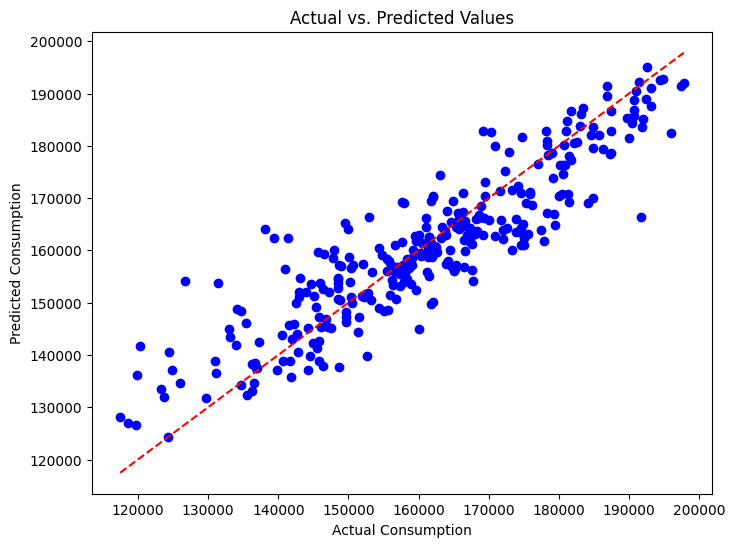

In [ ]:
# Scatter plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.show()
